## 1.오차분석

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func_1(p, a, b):
    """1차 함수."""
    return a + b * p


def func_2(p, a, b, c):
    """2차 함수."""
    return a + b * p + c * p**2


def func_21(p, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, q, r, s, t, u, v, x):
    """21차 함수."""
    return (
        a
        + b * p
        + c * p**2
        + d * p**3
        + e * p**4
        + f * p**5
        + g * p**6
        + h * p**7
        + i * p**8
        + j * p**9
        + k * p**10
        + l * p**11
        + m * p**12
        + n * p**13
        + o * p**14
        + q * p**15
        + r * p**16
        + s * p**17
        + t * p**18
        + u * p**19
        + v * p**20
        + x * p**21
    )

In [2]:
x = np.arange(-5.0, 5.0, 0.05, dtype=np.float64)
y = func_2(x, 1, 2, 3) + 18.0 * np.random.normal(0, 1, size=len(x))
print(len(x))

200


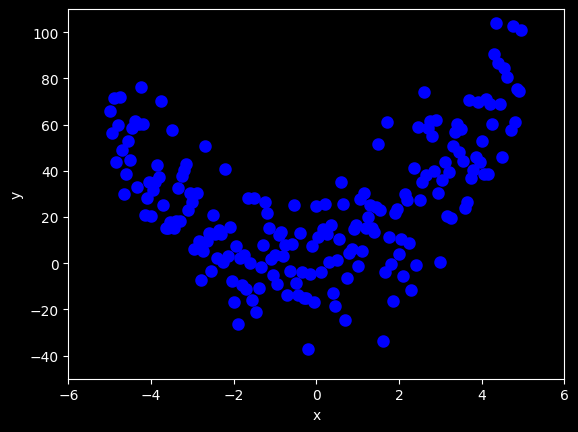

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color="blue", linewidths=3)

plt.ylabel("y")
plt.xlabel("x")

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.show()

In [4]:
popt, pcov = curve_fit(func_2, x, y)
print(popt)
print(pcov)

[2.03833512 2.81565847 2.95212904]
[[ 3.43751516e+00 -6.87524629e-03 -2.29175310e-01]
 [-6.87524629e-03  1.83409008e-01  1.37518857e-03]
 [-2.29175310e-01  1.37518857e-03  2.75037872e-02]]


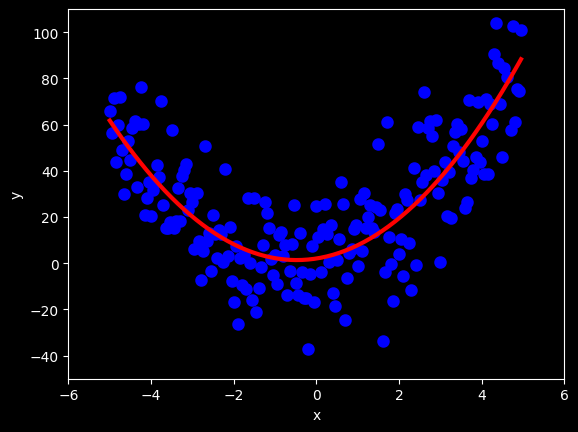

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color="blue", linewidths=3)
ax.plot(x, func_2(x, *popt), color="red", linewidth=3)

plt.ylabel("y")
plt.xlabel("x")

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.show()

In [6]:
np.mean(np.abs(y - func_2(x, *popt))).round(2)

np.float64(13.99)

In [7]:
popt, pcov = curve_fit(func_1, x, y)
np.mean(np.abs(y - func_1(x, *popt))).round(2)

np.float64(22.66)

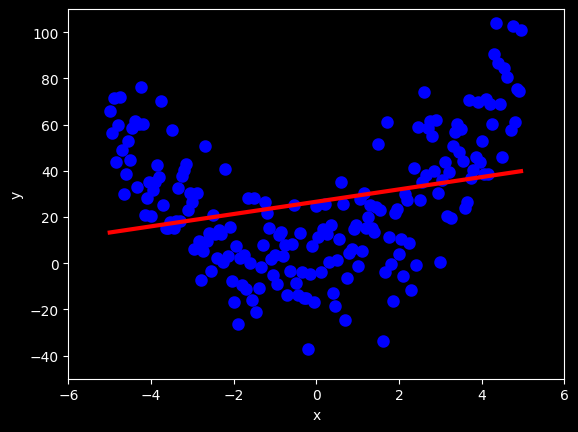

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color="blue", linewidths=3)
ax.plot(x, func_1(x, popt[0], popt[1]), color="red", linewidth=3)

plt.ylabel("y")
plt.xlabel("x")

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.show()

In [9]:
popt, pcov = curve_fit(func_21, x, y)
np.mean(np.abs(y - func_21(x, *popt))).round(2)

np.float64(13.15)

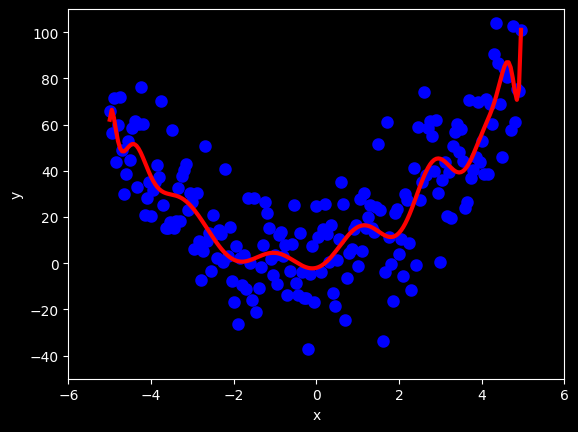

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color="blue", linewidths=3)
ax.plot(x, func_21(x, *popt), color="red", linewidth=3)

plt.ylabel("y")
plt.xlabel("x")

plt.ylim(-50, 110)
plt.xlim(-6, 6)

plt.axis(True)
plt.show()

In [11]:
yy = []
poptl = []
for i in range(0, 10):
    np.random.seed(seed=i)
    yy.append(func_2(x, 1, 2, 3) + 18.0 * np.random.normal(0, 1, size=len(x)))
    popt, _ = curve_fit(func_21, x, yy[i])
    poptl.append(popt)

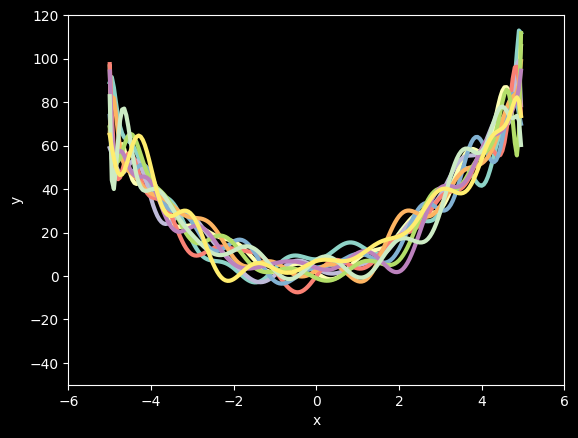

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(0, 10):
    ax.plot(x, func_21(x, *poptl[i]), lw=3)

plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-50, 120)
plt.xlim(-6, 6)
plt.axis(True)
plt.show()

In [13]:
yy = []
poptl = []
for i in range(0, 10):
    np.random.seed(seed=i)
    yy.append(func_1(x, 1, 2) + 18.0 * np.random.normal(0, 1, size=len(x)))
    popt, _ = curve_fit(func_1, x, yy[i])
    poptl.append(popt)

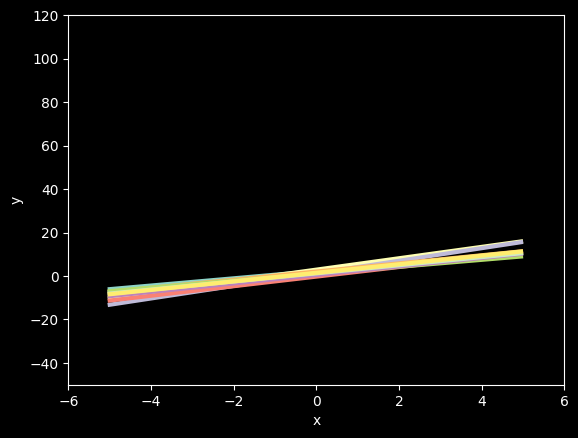

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 10):
    ax.plot(x, func_1(x, *poptl[i]), lw=3)
plt.ylabel("y")
plt.xlabel("x")
plt.ylim(-50, 120)
plt.xlim(-6, 6)
plt.axis(True)
plt.show()

## 2.자료 분할

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print("Dimensions of the training dataset: ", x_train.shape)
print("Dimensions of the test dataset: ", x_test.shape)
print("Dimensions of the training labels: ", y_train.shape)
print("Dimensions of the test labels: ", y_test.shape)

Dimensions of the training dataset:  (60000, 28, 28)
Dimensions of the test dataset:  (10000, 28, 28)
Dimensions of the training labels:  (60000,)
Dimensions of the test labels:  (10000,)


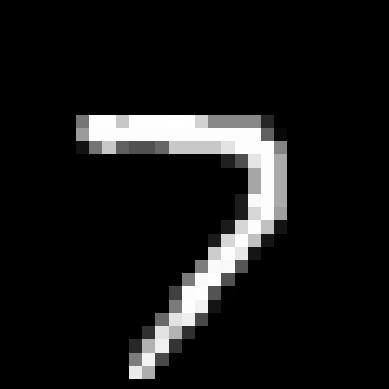

In [ ]:
def plot_digit(some_digit):
    plt.imshow(some_digit, cmap="gray")
    plt.axis("off")
    plt.savefig("Figure10-7.png", dpi=300)
    plt.show()


plot_digit(x_train[36003])

In [ ]:
for i in range(10):
    print(
        "digit",
        i,
        "makes",
        np.around(np.count_nonzero(y_train == i) / 60000.0 * 100.0, decimals=1),
        "% of the 60000 observations",
    )

digit 0 makes 9.9 % of the 60000 observations
digit 1 makes 11.2 % of the 60000 observations
digit 2 makes 9.9 % of the 60000 observations
digit 3 makes 10.2 % of the 60000 observations
digit 4 makes 9.7 % of the 60000 observations
digit 5 makes 9.0 % of the 60000 observations
digit 6 makes 9.9 % of the 60000 observations
digit 7 makes 10.4 % of the 60000 observations
digit 8 makes 9.8 % of the 60000 observations
digit 9 makes 9.9 % of the 60000 observations


In [ ]:
for i in range(10):
    print(
        "digit",
        i,
        "makes",
        np.around(np.count_nonzero(y_test == i) / 10000.0 * 100.0, decimals=1),
        "% of the 10000 observations",
    )

digit 0 makes 9.8 % of the 10000 observations
digit 1 makes 11.4 % of the 10000 observations
digit 2 makes 10.3 % of the 10000 observations
digit 3 makes 10.1 % of the 10000 observations
digit 4 makes 9.8 % of the 10000 observations
digit 5 makes 8.9 % of the 10000 observations
digit 6 makes 9.6 % of the 10000 observations
digit 7 makes 10.3 % of the 10000 observations
digit 8 makes 9.7 % of the 10000 observations
digit 9 makes 10.1 % of the 10000 observations


In [ ]:
x_train_reshaped = x_train.reshape(60000, 784)
x_test_reshaped = x_test.reshape(10000, 784)
x_train_normalised = x_train_reshaped / 255.0
x_test_normalised = x_test_reshaped / 255.0

y_train_unbalanced = np.zeros_like(y_train)
y_train_unbalanced[np.any([y_train == 8], axis=0)] = 0
y_train_unbalanced[np.any([y_train != 8], axis=0)] = 1

y_test_unbalanced = np.zeros_like(y_test)
y_test_unbalanced[np.any([y_test == 8], axis=0)] = 0
y_test_unbalanced[np.any([y_test != 8], axis=0)] = 1

print(np.sum(y_train_unbalanced == 0))
print(np.sum(y_train_unbalanced == 1))

5851
54149


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logit = LogisticRegression(max_iter=300)
logit.fit(x_train_normalised, y_train_unbalanced)
y_train_pred = logit.predict(x_train_normalised)
y_test_pred = logit.predict(x_test_normalised)

print(accuracy_score(y_train_unbalanced, y_train_pred))
print(confusion_matrix(y_train_unbalanced, y_train_pred))
print(classification_report(y_train_unbalanced, y_train_pred))

0.9615333333333334
[[ 4201  1650]
 [  658 53491]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      5851
           1       0.97      0.99      0.98     54149

    accuracy                           0.96     60000
   macro avg       0.92      0.85      0.88     60000
weighted avg       0.96      0.96      0.96     60000



In [ ]:
x_train_12 = x_train[np.any([y_train == 1, y_train == 2], axis=0)]
x_test_12 = x_test[np.any([y_test == 1, y_test == 2], axis=0)]
y_train_12 = y_train[np.any([y_train == 1, y_train == 2], axis=0)]
y_test_12 = y_test[np.any([y_test == 1, y_test == 2], axis=0)]

x_train_normalised = x_train_12 / 255.0
x_test_normalised = x_test_12 / 255.0

x_train_normalised = x_train_normalised.reshape(x_train_normalised.shape[0], 784)
x_test_normalised = x_test_normalised.reshape(x_test_normalised.shape[0], 784)

# make 0 and 1
y_train_bin = y_train_12 - 1
y_test_bin = y_test_12 - 1

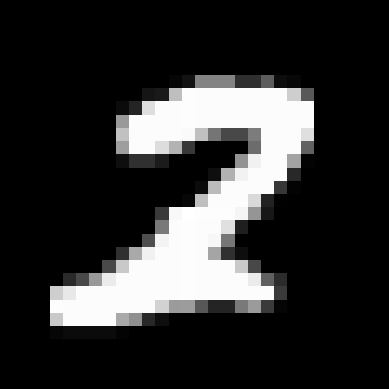

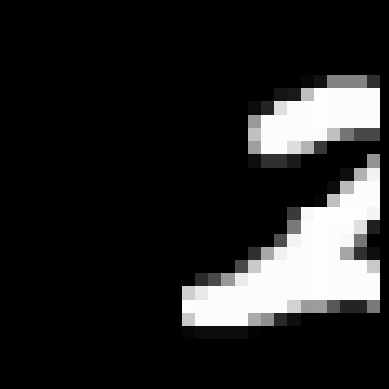

In [ ]:
x_test_shifted = np.zeros_like(x_test_normalised)
for i in range(x_test_normalised.shape[0]):
    tmp = x_test_normalised[i, :].reshape(28, 28)
    tmp_shifted = np.zeros_like(tmp)
    tmp_shifted[:, 10:28] = tmp[:, 0:18]
    x_test_shifted[i, :] = tmp_shifted.reshape(784)

plot_digit(x_test_12[2000])
plot_digit(x_test_shifted[2000].reshape(28, 28))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logit = LogisticRegression(max_iter=300)
logit.fit(x_train_normalised, y_train_bin)
y_train_pred = logit.predict(x_train_normalised)
y_test_pred = logit.predict(x_test_normalised)
y_test_shift = logit.predict(x_test_shifted)
print(accuracy_score(y_train_bin, y_train_pred))
print(accuracy_score(y_test_bin, y_test_pred))
print(accuracy_score(y_test_bin, y_test_shift))

0.9958267716535433
0.9930779880018459
0.5703737886479003


## 4.교차검증

In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    header=None,
)

from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
le.transform(["B", "M"])

array([0, 1])

In [ ]:
print(1 - y.mean())

0.6274165202108963


In [ ]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=1
)

# Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
    StandardScaler(), PCA(n_components=4), LogisticRegression(random_state=1)
)

pipe_lr.fit(X_train, y_train)
y_train_pred = pipe_lr.predict(X_train)
y_test_pred = pipe_lr.predict(X_test)

# Accuracy Score
pipe_lr.score(X_train, y_train)

0.967032967032967

In [40]:
pipe_lr.score(X_test, y_test)

0.956140350877193

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10)
print("CV accuracy scores: %s" % scores)

CV accuracy scores: [0.97826087 0.95652174 0.95652174 0.95652174 0.91304348 0.95555556
 0.97777778 0.97777778 1.         0.97777778]


In [ ]:
import numpy as np

print("CV accuracy: %.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

CV accuracy: 0.965 +/- 0.022


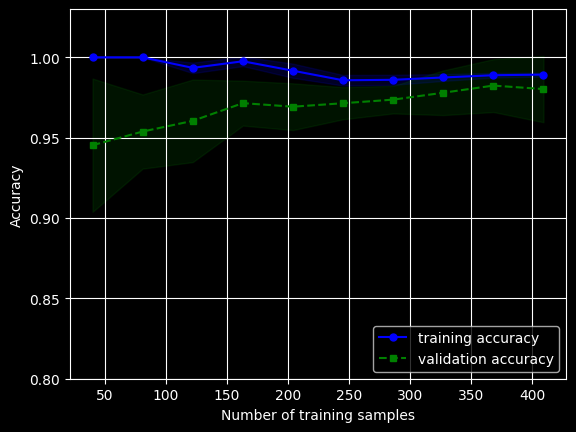

In [ ]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2", random_state=1)
)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(
    train_sizes,
    train_mean,
    color="blue",
    marker="o",
    markersize=5,
    label="training accuracy",
)
plt.fill_between(
    train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15,
    color="blue",
)

plt.plot(
    train_sizes,
    test_mean,
    color="green",
    linestyle="--",
    marker="s",
    markersize=5,
    label="validation accuracy",
)
plt.fill_between(
    train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green"
)
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
from sklearn.svm import SVC

model = SVC()
print(model.get_params().keys())
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {"svc__C": param_range, "svc__kernel": ["linear"]},
    {"svc__C": param_range, "svc__gamma": param_range, "svc__kernel": ["rbf"]},
]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring="accuracy", cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.9846859903381642


In [47]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [48]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

In [ ]:
### Grid search에 의한 초모수 결정 (SVM) ###
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

param_space = {
    "svc__C": Real(1e-6, 1e6, prior="log-uniform"),
    "svc__gamma": Real(1e-6, 1e1, prior="log-uniform"),
    "svc__kernel": Categorical(["linear", "poly", "rbf"]),
}
gs = BayesSearchCV(
    estimator=pipe_svc, search_spaces=param_space, scoring="accuracy", cv=10
)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print(gs.score(X_test, y_test))

0.9758937198067633
OrderedDict([('svc__C', 3.239531959161387), ('svc__gamma', 1e-06), ('svc__kernel', 'linear')])
0.9736842105263158
